In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.85, 51.51, 59.91, 39.91, 19.01, 14.6, 40.71, 47.61, 32.77, 25.05]
The temperature information received is: [10.39, 10.16, 4.13, 8.05, 30, 26.6, 5.91, 6.73, 15.44, 18.21]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.85,10.39
1,London,51.51,10.16
2,Oslo,59.91,4.13
3,Beijing,39.91,8.05
4,Mumbai,19.01,30.00
5,Manila,14.60,26.60
6,New York,40.71,5.91
7,Seattle,47.61,6.73
8,Dallas,32.77,15.44
9,Taipei,25.05,18.21


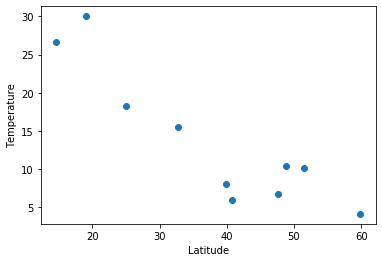

In [5]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [6]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     7.708492
1     6.274363
2     1.745537
3    12.528457
4    23.796609
5    26.174243
6    12.097140
7     8.377033
8    16.377960
9    20.540167
Name: lat, dtype: float64


In [7]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.54x +34.05


The r-squared is: 0.8116794582213588


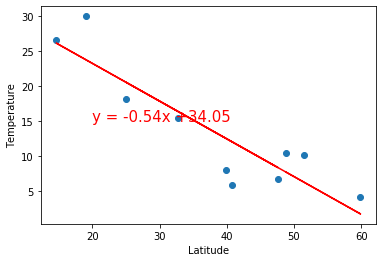

In [8]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

In [9]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 10.45.


In [10]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 13.99
